In [1]:
!pip install lightgbm
!pip install sdv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 132.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66

# **Income Prediction**

**Purpose:** To deliver a data-driven income prediction model that enables stakeholders to make informed, consistent, and scalable decisions.

**Goal:** Accurately predict whether an individual's income exceeds a defined threshold based on demographic and employment-related features.

# PACE Framework

## Pace: **Plan Stage**

# ***Data fields***

| Variable Name     | Role    | Type        | Demographic | Description                                                                                                     | Units | Missing Values |
|------------------|---------|-------------|-------------|------------------------------------------------------------------------------------------------------------------|--------|----------------|
| age              | Feature | Integer     | Age         | N/A                                                                                                              |        | no             |
| workclass        | Feature | Categorical | Income      | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.          |        | yes            |
| fnlwgt           | Feature | Integer     |             | Final weight                                                                                                     |        | no             |
| education        | Feature | Categorical | Education   | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, etc.    |        | no             |
| education-num    | Feature | Integer     | Education   | Encoded numeric representation of education level                                                               |        | no             |
| marital-status   | Feature | Categorical | Other       | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-AF-spouse                              |        | no             |
| occupation       | Feature | Categorical | Other       | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, etc.      |        | yes            |
| relationship     | Feature | Categorical | Other       | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                                             |        | no             |
| race             | Feature | Categorical | Race        | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                                    |        | no             |
| sex              | Feature | Binary      | Sex         | Female, Male                                                                                                     |        | no             |
| capital-gain     | Feature | Integer     |             | Capital gains from investment or asset sales                                                                    |        | no             |
| capital-loss     | Feature | Integer     |             | Capital loss                                                                                                     |        | no             |
| hours-per-week   | Feature | Integer     |             | Hours worked per week                                                                                           |        | no             |
| native-country   | Feature | Categorical | Other       | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, India, Japan, Greece, China, Cuba, etc.         |        | yes            |
| income           | Target  | Binary      | Income      | >50K, <=50K                                                                                                      |        | no             |


### Import packages

In [2]:
# For data manipulation
import numpy as np
import pandas as pd
import math
import calendar

# For data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from matplotlib_venn import venn3
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance as xgb_plot_importance

from lightgbm import LGBMClassifier
from lightgbm import plot_importance as lgb_plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For classification metrics and utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.sparse import hstack
from sklearn.decomposition import PCA

# For saving models
import pickle

# For statistical analysis
from scipy import stats

# For accessing the dataset in Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Load dataset

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/Data_sci/UCI Adult/adult_train.csv")
df_train.head()

,age,workclass,Unnamed: 2,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_test = pd.read_csv("/content/drive/MyDrive/Data_sci/UCI Adult/adult_test.csv")
df_test.head()

,age,workclass,Unnamed: 2,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## Data Exploration (Initial EDA and data cleaning)


### Gather basic information about the data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   Unnamed: 2      32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   Unnamed: 2      16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  Income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


### Gather descriptive statistics about the data

In [7]:
df_train.describe()

,age,Unnamed: 2,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df_test.describe()

,age,Unnamed: 2,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [5]:
# Strip all whitespace from string values
df_train = df_train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_test = df_test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df_train['Income'] = df_train['Income'].str.replace('.', '', regex=False).str.strip()
df_test['Income'] = df_test['Income'].str.replace('.', '', regex=False).str.strip()


df_train.replace("?", np.nan, inplace=True)
df_test.replace("?", np.nan, inplace=True)

<ipython-input-5-cdd8230da030>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train = df_train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-5-cdd8230da030>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test = df_test.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [6]:
df_train.drop(['Unnamed: 2'], axis=1, inplace=True)
df_test.drop(['Unnamed: 2'],  axis=1, inplace=True)

### Check duplicates

In [7]:
df_train.duplicated().sum()

np.int64(3465)

In [8]:
df_test.duplicated().sum()

np.int64(1022)

In [9]:
df_train.drop_duplicates(inplace=True, ignore_index=True, keep="first")
df_test.drop_duplicates(inplace=True, ignore_index=True, keep="first")

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Data Exploration (Continue EDA)



In [10]:
# Convert income to binary (target)
df_train['Income'] = df_train['Income'].apply(lambda x: 1 if x == '>50K' else 0)
df_test['Income'] = df_test['Income'].apply(lambda x: 1 if x == '>50K' else 0)


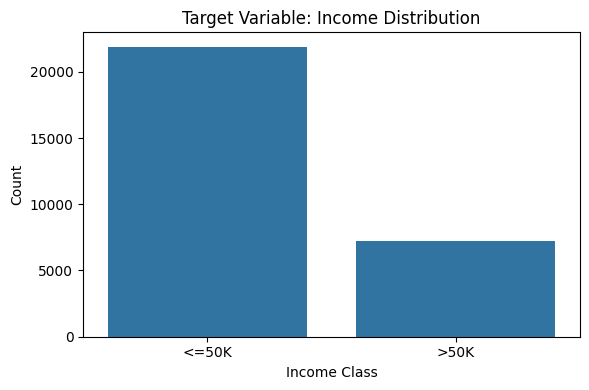

In [11]:
# Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Income', data=df_train)
plt.title("Target Variable: Income Distribution")
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.ylabel("Count")
plt.xlabel("Income Class")
plt.tight_layout()
plt.show()

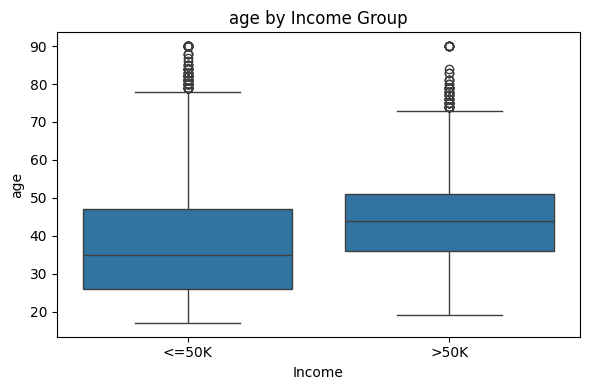

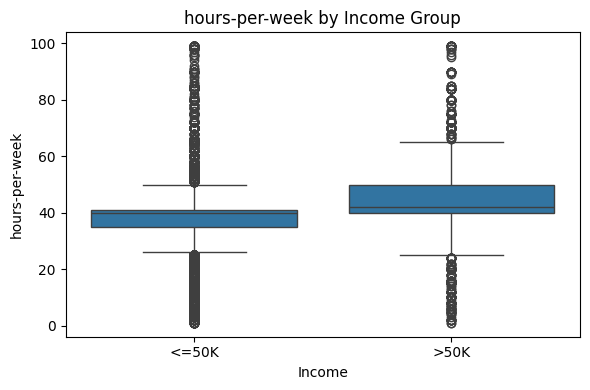

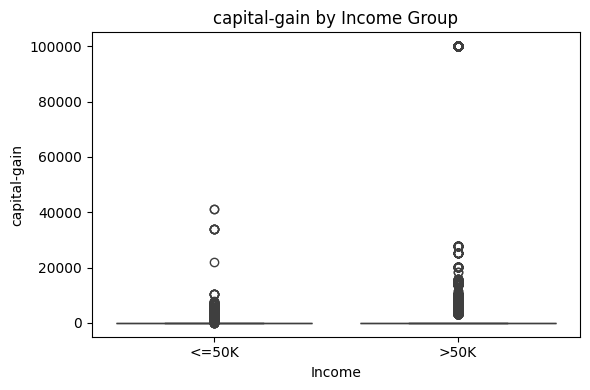

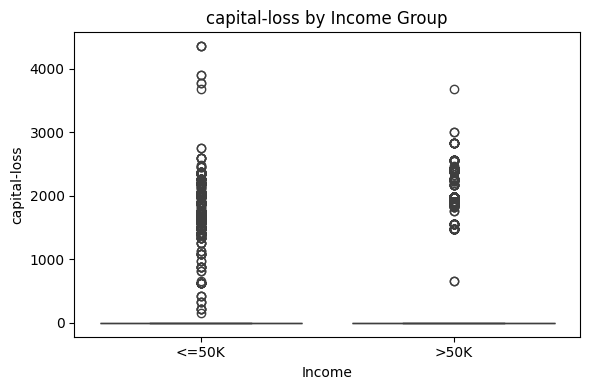

In [16]:
# Numerical Features by Income
num_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Income', y=col, data=df_train)
    plt.title(f'{col} by Income Group')
    plt.xticks([0, 1], ['<=50K', '>50K'])
    plt.tight_layout()
    plt.show()

<ipython-input-17-95d3162e4921>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_df.index, y=prop_df.values, palette='pastel')


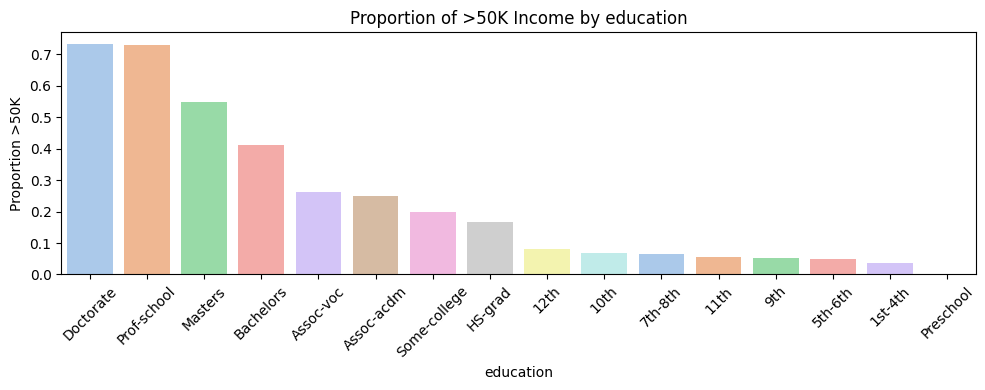

<ipython-input-17-95d3162e4921>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_df.index, y=prop_df.values, palette='pastel')


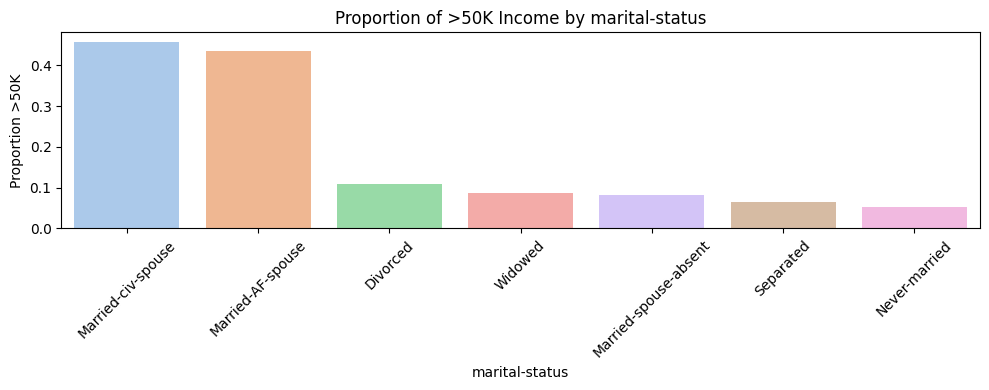

<ipython-input-17-95d3162e4921>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_df.index, y=prop_df.values, palette='pastel')


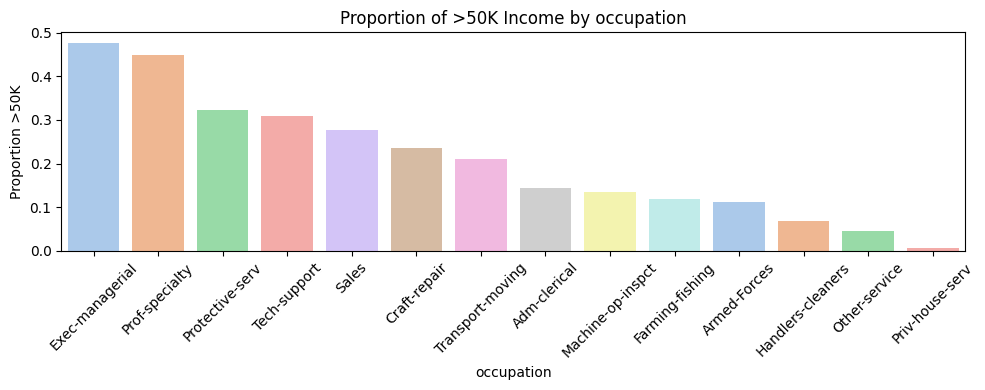

<ipython-input-17-95d3162e4921>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_df.index, y=prop_df.values, palette='pastel')


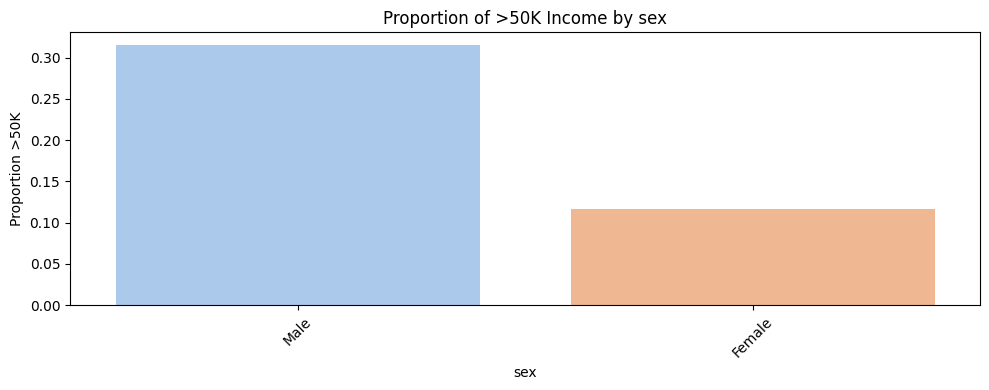

<ipython-input-17-95d3162e4921>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_df.index, y=prop_df.values, palette='pastel')


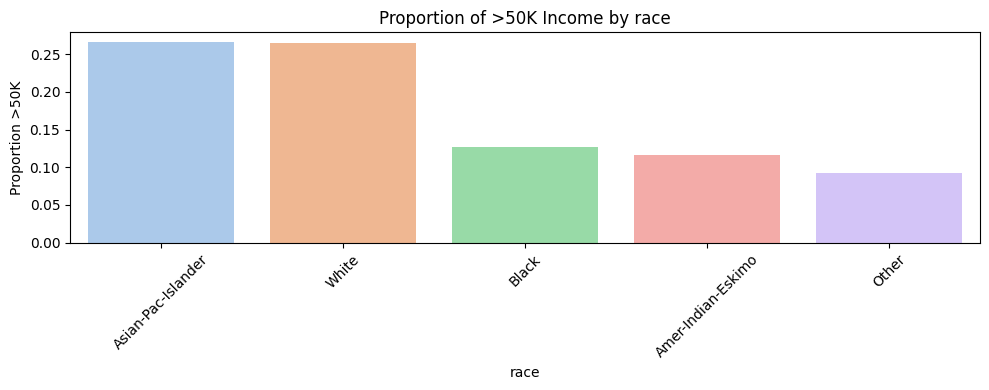

In [17]:
# Categorical Features by Income Proportion
cat_cols = ['education', 'marital-status', 'occupation', 'sex', 'race']
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    prop_df = df_train.groupby(col)['Income'].mean().sort_values(ascending=False)
    sns.barplot(x=prop_df.index, y=prop_df.values, palette='pastel')
    plt.title(f'Proportion of >50K Income by {col}')
    plt.ylabel("Proportion >50K")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

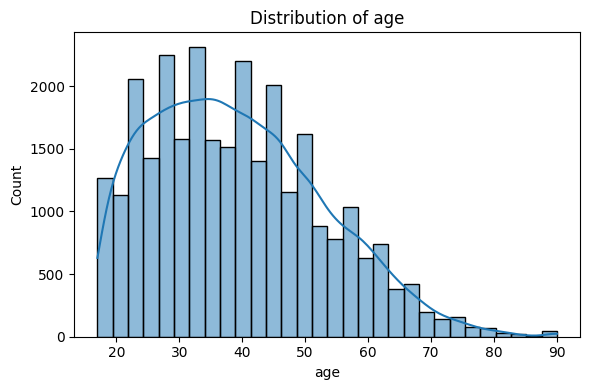

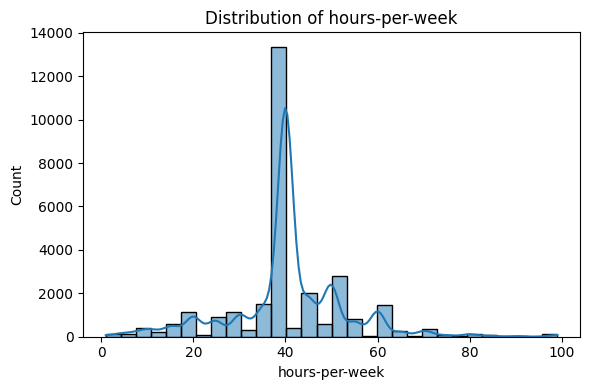

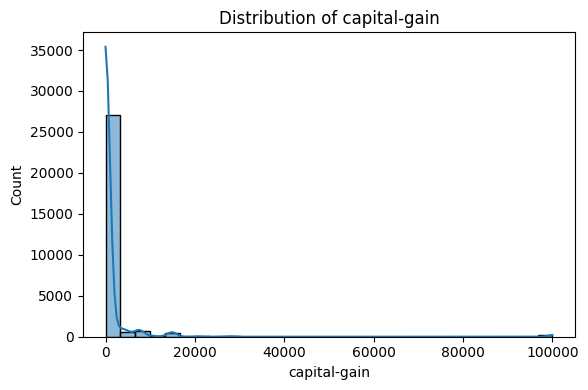

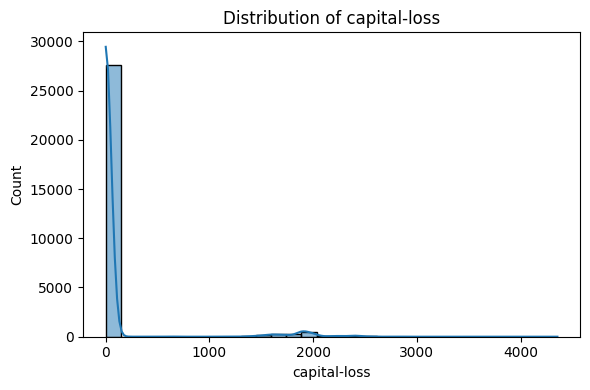

In [18]:
num_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_train, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

<ipython-input-20-e58b8a180894>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Set2')


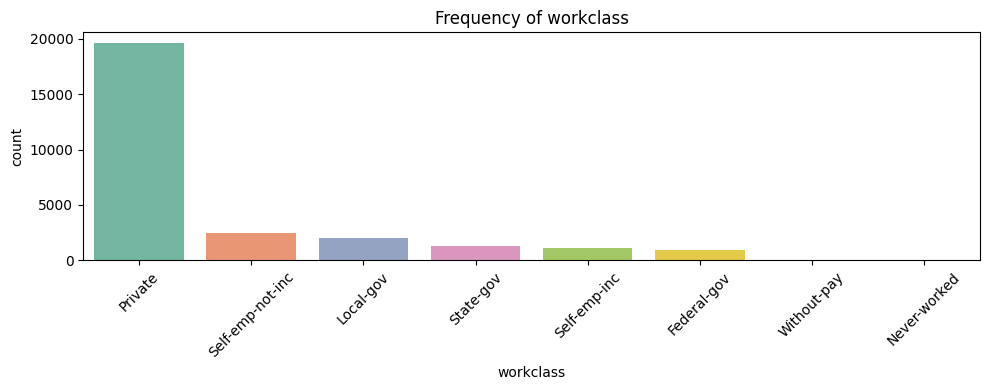

<ipython-input-20-e58b8a180894>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Set2')


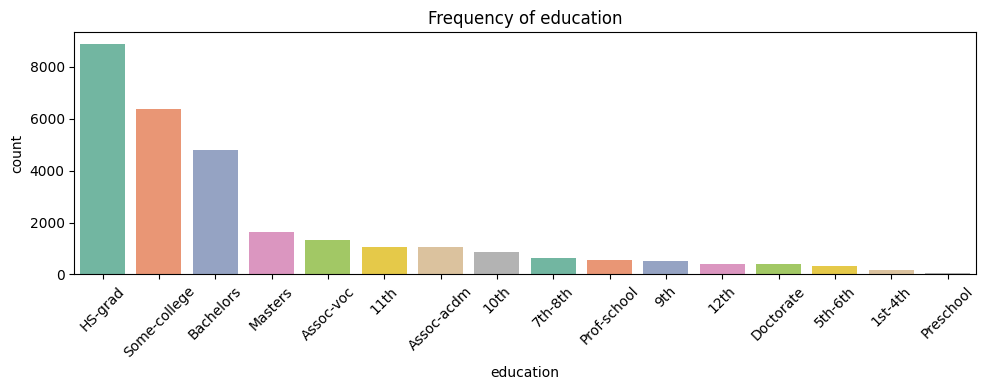

<ipython-input-20-e58b8a180894>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Set2')


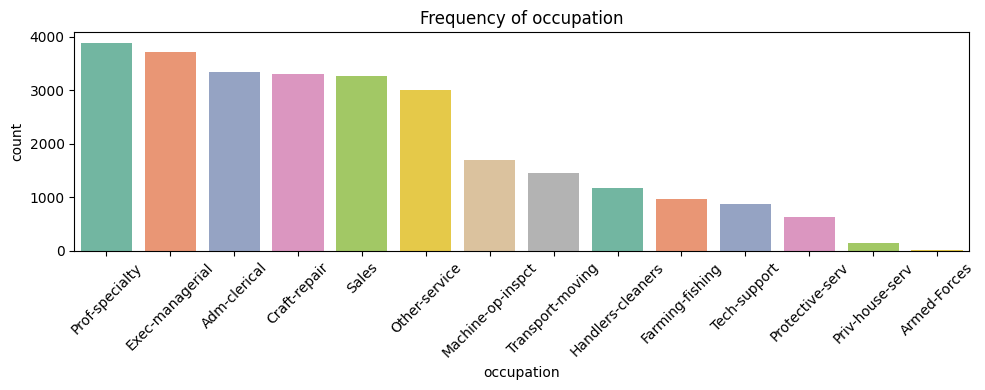

<ipython-input-20-e58b8a180894>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Set2')


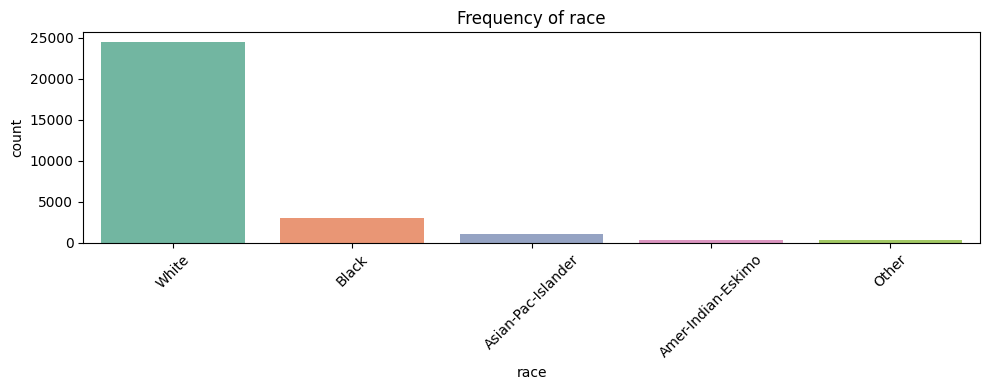

<ipython-input-20-e58b8a180894>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Set2')


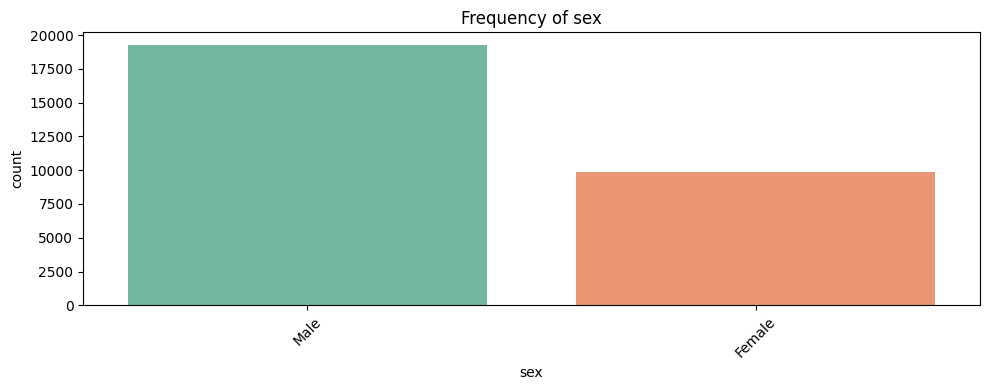

<ipython-input-20-e58b8a180894>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Set2')


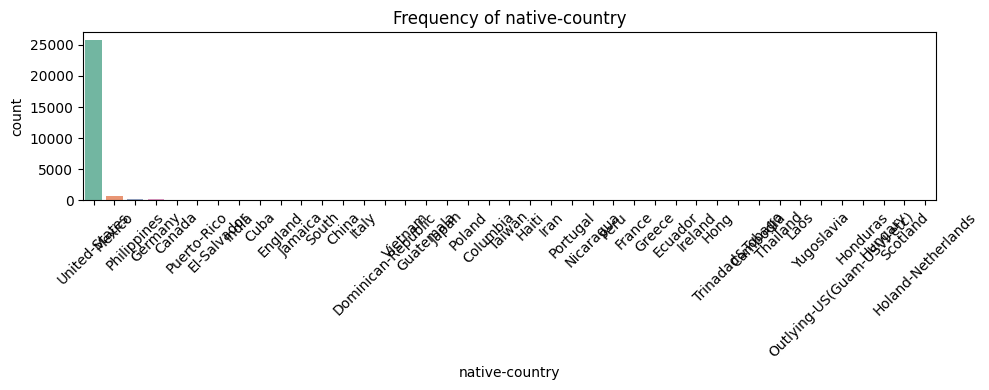

In [ ]:
cat_cols = ['workclass', 'education', 'occupation', 'race', 'sex', 'native-country']
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

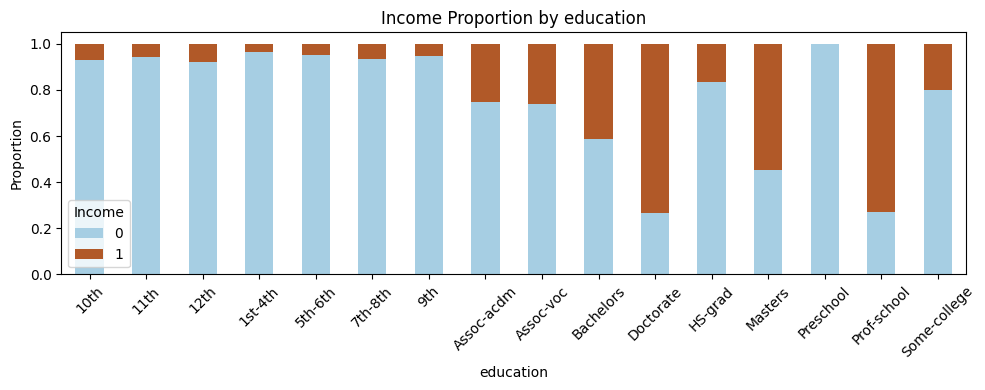

In [ ]:
col = 'education'  # Example; repeat for others
cross_tab = pd.crosstab(df_train[col], df_train['Income'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 4), colormap='Paired')
plt.title(f'Income Proportion by {col}')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

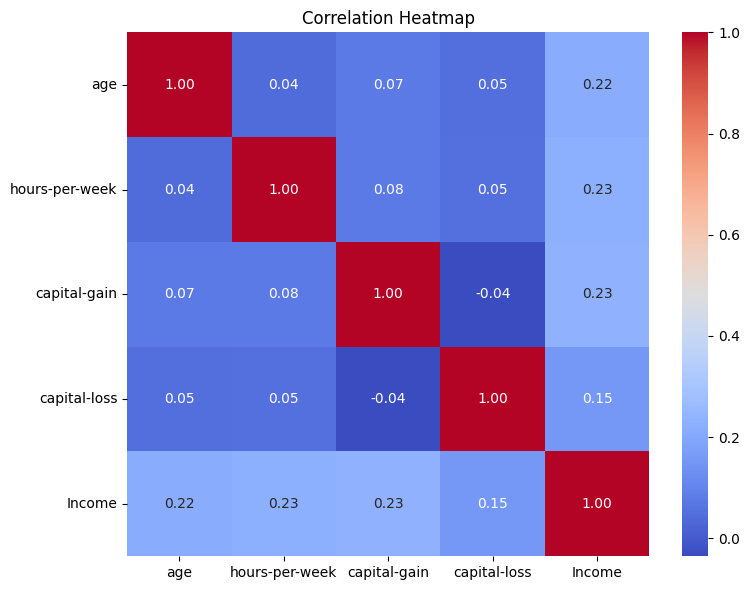

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df_train[num_cols + ['Income']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

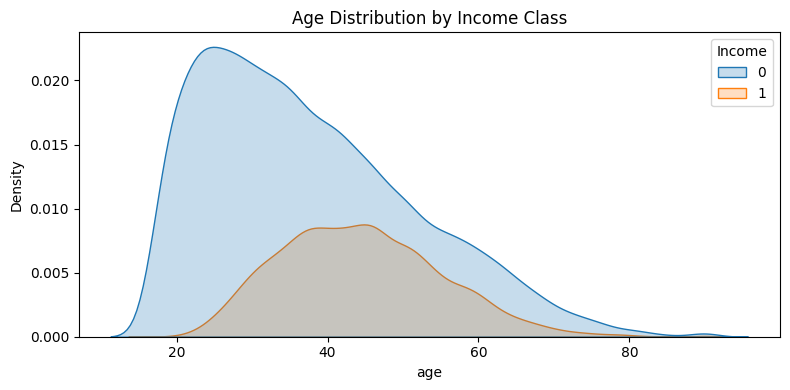

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df_train, x='age', hue='Income', fill=True)
plt.title('Age Distribution by Income Class')
plt.tight_layout()
plt.show()

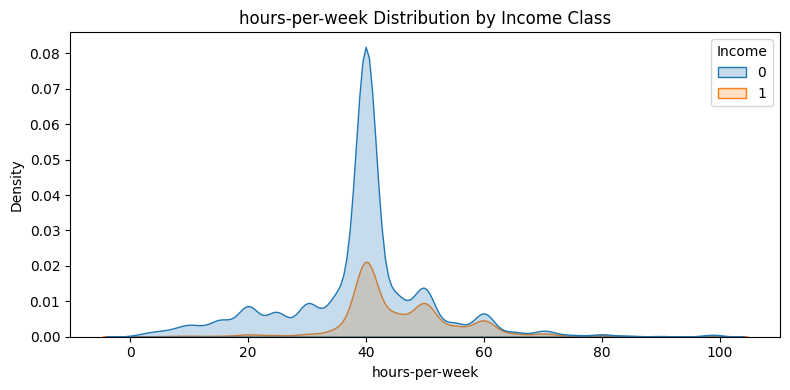

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df_train, x='hours-per-week', hue='Income', fill=True)
plt.title('hours-per-week Distribution by Income Class')
plt.tight_layout()
plt.show()


## Data preprocessing

### Handle Outlier

In [19]:
def handle_outliers(data, columns, iqr_factor=1.5, drop_threshold=0.1):
    df = data.copy()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - iqr_factor * iqr
        upper = q3 + iqr_factor * iqr

        outliers = (df[col] < lower) | (df[col] > upper)
        num_outliers = outliers.sum()

        if num_outliers <= len(df) * drop_threshold:
            df = df[~outliers]
            print(f"{col}: {num_outliers} outliers dropped")
        else:
            df.loc[df[col] < lower, col] = lower
            df.loc[df[col] > upper, col] = upper
            print(f"{col}: {num_outliers} outliers capped")
    return df

In [20]:
cols_to_fix = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
df_train = handle_outliers(df_train, cols_to_fix, iqr_factor=1.5, drop_threshold=0.01)


age: 141 outliers dropped
capital-gain: 2678 outliers capped
capital-loss: 1504 outliers capped
hours-per-week: 8387 outliers capped


<ipython-input-19-a6b67869474a>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower, col] = lower


In [21]:
# Function to plot normalized distributions
def plot_feature_distributions(df1, df2, feature, title, label1='Missing', label2='Not Missing'):
    plt.figure(figsize=(8, 4))
    if df_train[feature].dtype == 'object':
        # Categorical: plot normalized countplot
        data1 = df1[feature].value_counts(normalize=True)
        data2 = df2[feature].value_counts(normalize=True)

        data = pd.concat([data1, data2], axis=1, keys=[label1, label2]).fillna(0)
        data.plot(kind='bar', alpha=0.8)
        plt.title(title)
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)
    else:
        # Numerical: plot KDE
        sns.kdeplot(df1[feature], label=label1, fill=True, common_norm=False, alpha=0.5)
        sns.kdeplot(df2[feature], label=label2, fill=True, common_norm=False, alpha=0.5)
        plt.title(title)
        plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

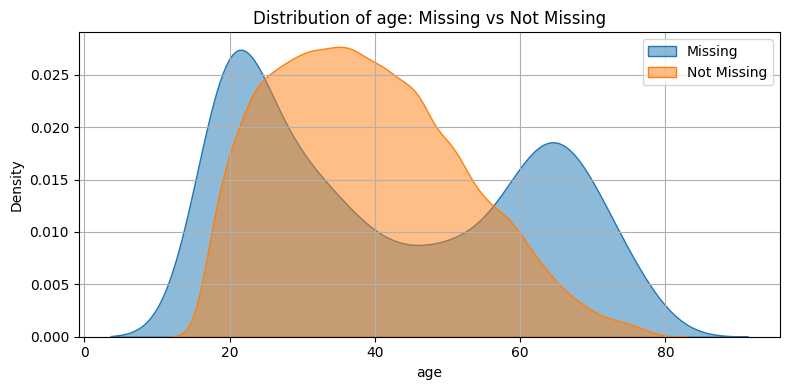

<Figure size 800x400 with 0 Axes>

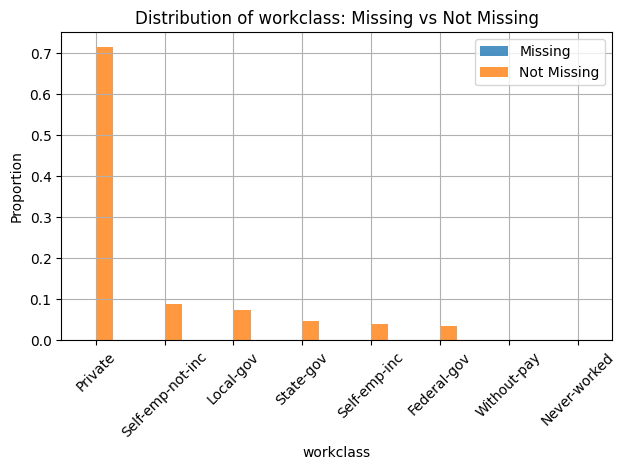

<Figure size 800x400 with 0 Axes>

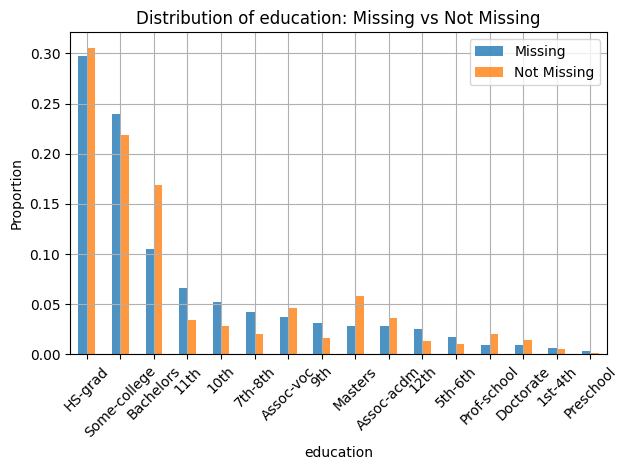

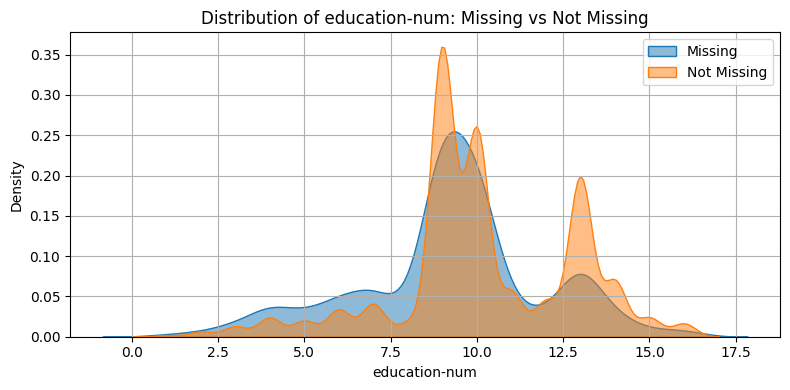

<Figure size 800x400 with 0 Axes>

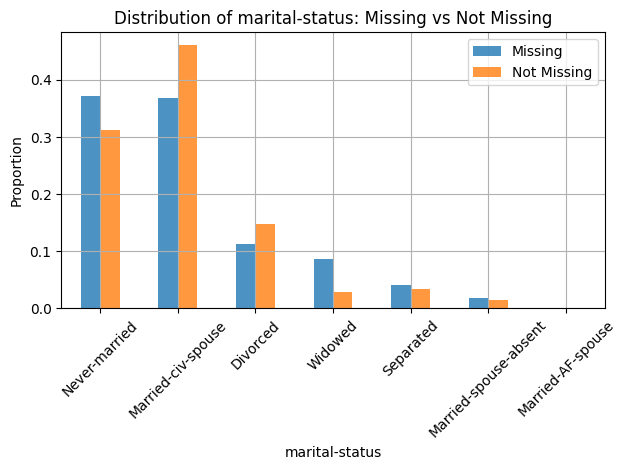

<Figure size 800x400 with 0 Axes>

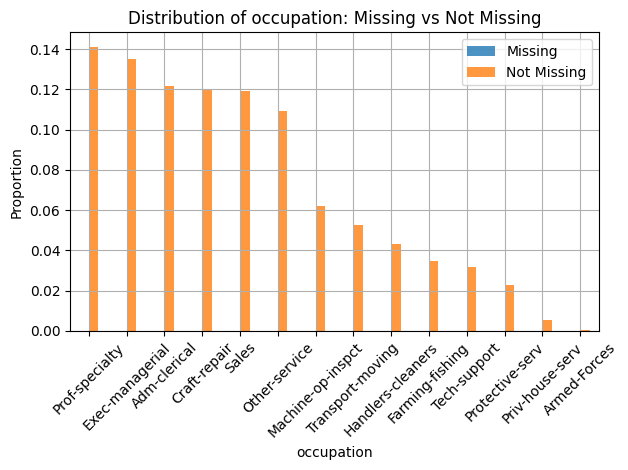

<Figure size 800x400 with 0 Axes>

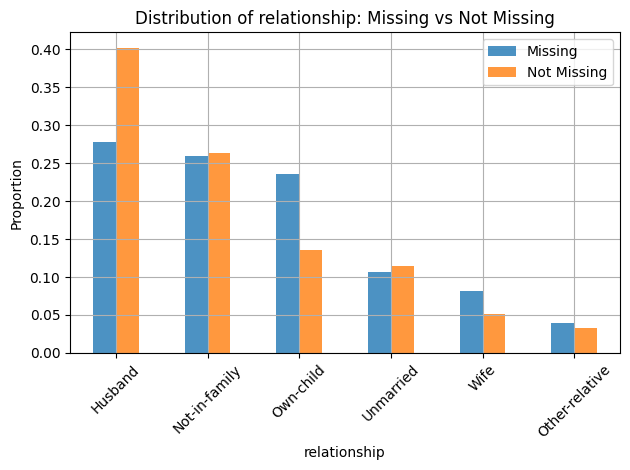

<Figure size 800x400 with 0 Axes>

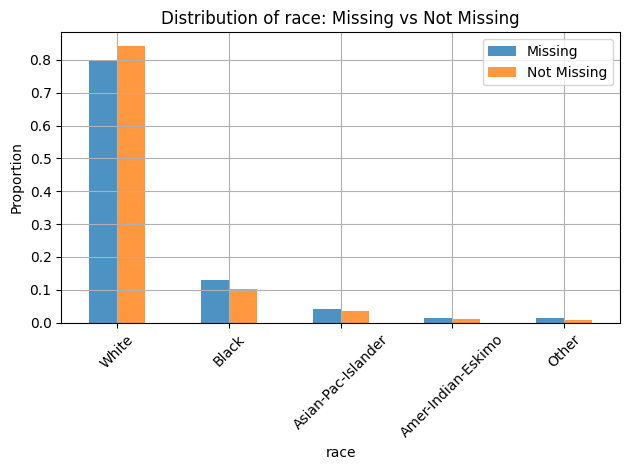

<Figure size 800x400 with 0 Axes>

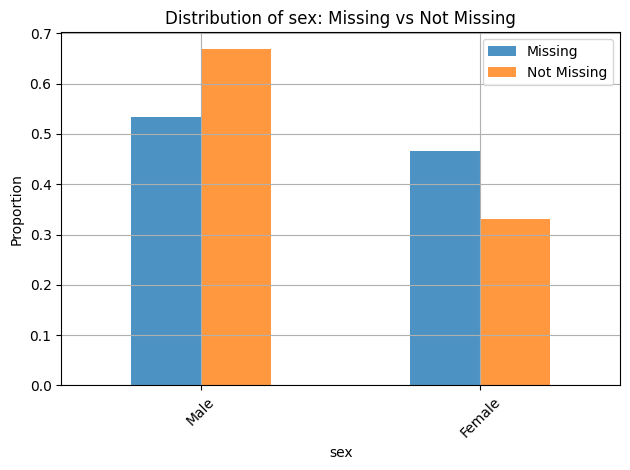

<ipython-input-21-8a55efa4f9c7>:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df1[feature], label=label1, fill=True, common_norm=False, alpha=0.5)
<ipython-input-21-8a55efa4f9c7>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df2[feature], label=label2, fill=True, common_norm=False, alpha=0.5)
<ipython-input-21-8a55efa4f9c7>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


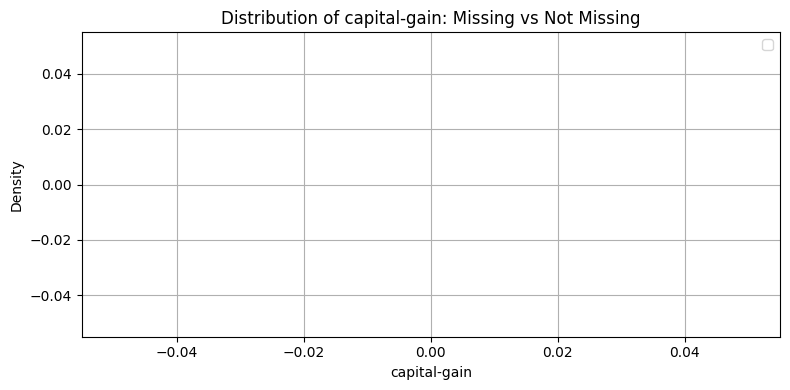

<ipython-input-21-8a55efa4f9c7>:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df1[feature], label=label1, fill=True, common_norm=False, alpha=0.5)
<ipython-input-21-8a55efa4f9c7>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df2[feature], label=label2, fill=True, common_norm=False, alpha=0.5)
<ipython-input-21-8a55efa4f9c7>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


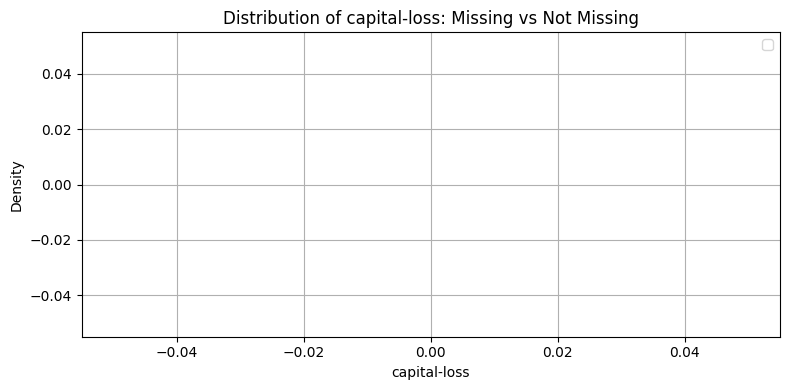

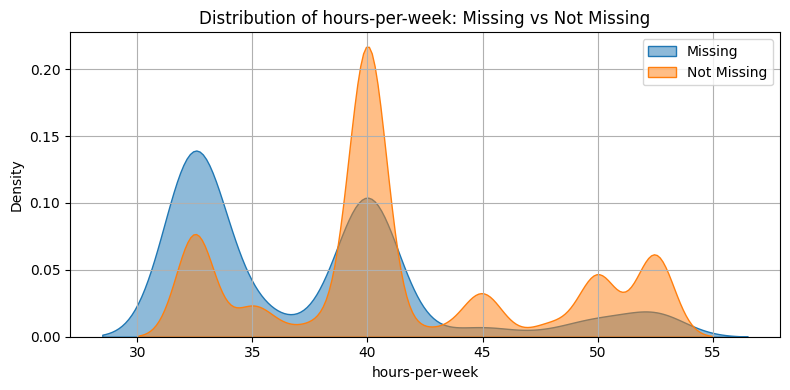

<Figure size 800x400 with 0 Axes>

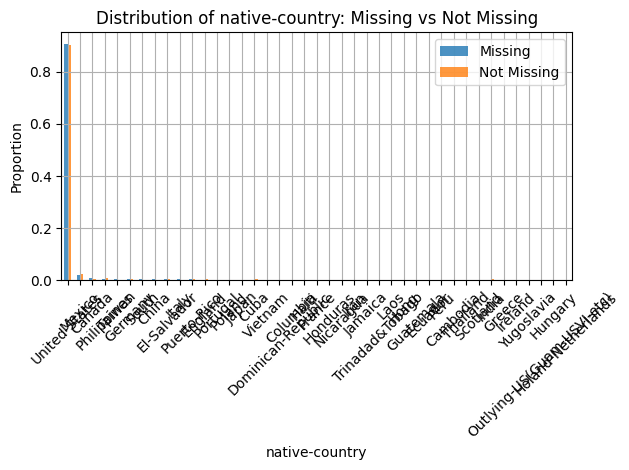

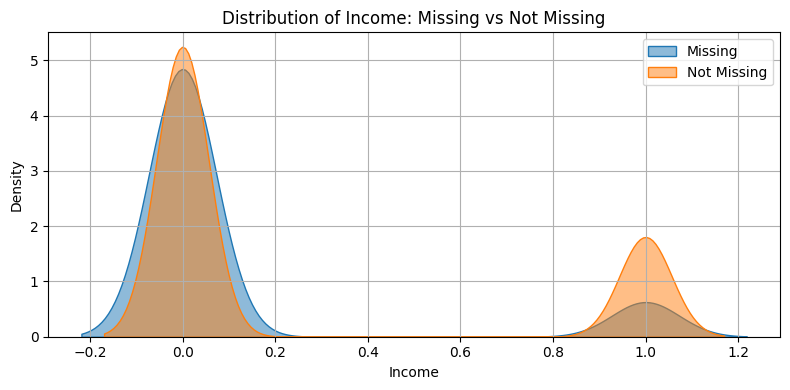

In [22]:
check_feature = 'workclass'

df_missing = df_train[df_train[check_feature].isnull()]
df_non_missing = df_train[df_train[check_feature].notnull()]

# Plot all features comparing missing vs non-missing for workclass
for col in df_train.columns:
    if col != 'check_feature':
        plot_feature_distributions(df_missing, df_non_missing, col, f'Distribution of {col}: Missing vs Not Missing')


In [23]:
# Basic counts of missing values
def summarize_missing(df, features):
    summary = {}
    for col in features:
        summary[col] = df[col].isnull().sum()
    return pd.Series(summary, name='Missing Count')

# Create flags for missing combinations
def create_missing_flags(df, features):
    missing_flags = df[features].isnull()
    missing_flags['any_missing'] = missing_flags.any(axis=1)
    missing_flags['all_missing'] = missing_flags.all(axis=1)
    missing_flags['missing_combo'] = missing_flags.apply(lambda row: ','.join([col for col in features if row[col]]), axis=1)
    return missing_flags

# Analyze overlaps
def analyze_missing_overlap(df, features):
    flags = create_missing_flags(df, features)
    combo_counts = flags['missing_combo'].value_counts().reset_index()
    combo_counts.columns = ['Missing Combination', 'Count']
    return combo_counts

# Venn diagram (optional, requires matplotlib-venn)
def plot_venn_diagram(df, features):
    sets = [set(df[df[col].isnull()].index) for col in features]
    venn3(sets, set_labels=features)
    plt.title("Missing Value Overlap")
    plt.show()

# Heatmap of missing value correlation
def plot_missing_heatmap(df, features):
    plt.figure(figsize=(6, 4))
    sns.heatmap(df[features].isnull().corr(), annot=True, cmap="Reds")
    plt.title("Correlation of Missingness")
    plt.show()


workclass         1597
occupation        1604
native-country     577
Name: Missing Count, dtype: int64
                   Missing Combination  Count
0                                       26800
1                 workclass,occupation   1571
2                       native-country    551
3  workclass,occupation,native-country     26
4                           occupation      7


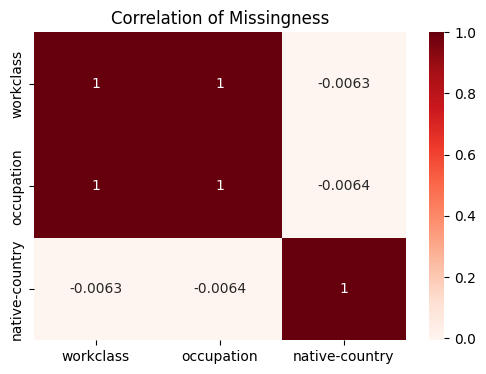

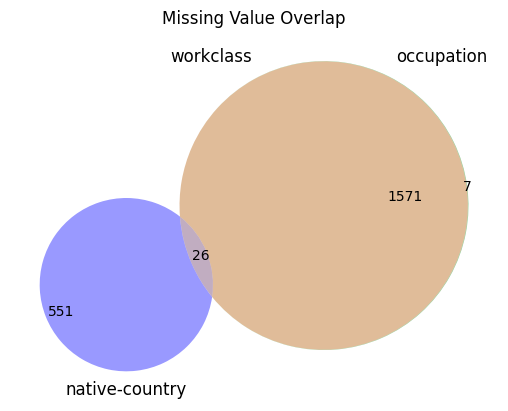

In [24]:
cols_to_check = ['workclass', 'occupation', 'native-country']

# Summary
missing_summary = summarize_missing(df_train, cols_to_check)
print(missing_summary)

# Overlap table
missing_overlap = analyze_missing_overlap(df_train, cols_to_check)
print(missing_overlap)

# Heatmap
plot_missing_heatmap(df_train, cols_to_check)

# Venn (optional)
plot_venn_diagram(df_train, cols_to_check)

In [12]:
def impute_with_kmeans(train_df, test_df, feature_cols, impute_cols, n_clusters=None, random_state=42):
    # Step 1: Separate complete and missing rows
    df_complete = train_df[train_df[impute_cols].notnull().all(axis=1)].copy()
    df_missing = train_df[train_df[impute_cols].isnull().any(axis=1)].copy()


    # Step 2: Encode categorical and scale numerical
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
    scaler = StandardScaler()

    X_cat = ohe.fit_transform(df_complete[feature_cols].select_dtypes('object'))
    X_num = scaler.fit_transform(df_complete[feature_cols].select_dtypes('number'))
    X_combined = hstack([X_cat, X_num])

    # Step 3: Auto-select k if not provided
    if n_clusters is None:
        print("==== Auto-select k if not provided ====")
        silhouette_scores = {}
        for k in range(2, 11):
            kmeans = KMeans(n_clusters=k, random_state=random_state)
            labels = kmeans.fit_predict(X_combined)
            silhouette_scores[k] = silhouette_score(X_combined, labels)
        n_clusters = max(silhouette_scores, key=silhouette_scores.get)
        print("k: ", n_clusters)

    # Step 4: Fit KMeans and label clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    df_complete['cluster'] = kmeans.fit_predict(X_combined)

    # Step 5: Get most frequent value per cluster
    cluster_modes = {}
    for col in impute_cols:
        cluster_modes[col] = df_complete.groupby('cluster')[col].agg(lambda x: x.mode()[0])

    # Step 6: Impute missing rows in train set
    X_miss_cat = ohe.transform(df_missing[feature_cols].select_dtypes('object'))
    X_miss_num = scaler.transform(df_missing[feature_cols].select_dtypes('number'))
    X_miss = hstack([X_miss_cat, X_miss_num])
    df_missing['cluster'] = kmeans.predict(X_miss)

    # Only replace missing values
    for col in impute_cols:
        missing_mask = df_missing[col].isnull()
        df_missing.loc[missing_mask, col] = df_missing.loc[missing_mask, 'cluster'].map(cluster_modes[col])
    df_missing.drop(columns='cluster', inplace=True)

    # Step 7: Combine train set back
    df_train_final = pd.concat([df_complete.drop(columns='cluster'), df_missing], axis=0).sort_index()

    # Step 8: Impute test set if needed
    df_test = test_df.copy()
    test_missing_mask = df_test[impute_cols].isnull().all(axis=1)
    if test_missing_mask.any():
        X_test_cat = ohe.transform(df_test.loc[test_missing_mask, feature_cols].select_dtypes('object'))
        X_test_num = scaler.transform(df_test.loc[test_missing_mask, feature_cols].select_dtypes('number'))
        X_test = hstack([X_test_cat, X_test_num])
        test_clusters = kmeans.predict(X_test)
        for col in impute_cols:
            df_test.loc[test_missing_mask, col] = [cluster_modes[col][c] for c in test_clusters]

    return df_train_final, df_test, ohe, scaler


In [13]:
feature_columns = ['education', 'marital-status', 'relationship', 'race', 'sex',
                   'age', 'hours-per-week', 'capital-gain', 'capital-loss', 'education-num']

# To impute both workclass and occupation
df_train_imputed, df_test_imputed, ohe, scaler = impute_with_kmeans(df_train, df_test, feature_columns, ['workclass', 'occupation'], n_clusters=7)


In [14]:
# PCA Scatter Plot
def plot_pca_clusters(df_encoded, was_imputed, title="PCA of Features"):

    pca = PCA(n_components=2)
    components = pca.fit_transform(df_encoded)

    plot_df = pd.DataFrame(components, columns=["PC1", "PC2"])
    plot_df["Imputed"] = was_imputed.map({True: "Imputed", False: "Original"})

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue="Imputed", alpha=0.7)
    plt.title(title)
    plt.grid(True)
    plt.show()


In [15]:
# Boolean Series for rows that were imputed
was_imputed = df_train['workclass'].isnull() & df_train['occupation'].isnull()

# Use the same encoding used in clustering
X_cat = ohe.transform(df_train_imputed[feature_columns].select_dtypes('object'))
X_num = scaler.transform(df_train_imputed[feature_columns].select_dtypes('number'))
X_encoded = hstack([X_cat, X_num])


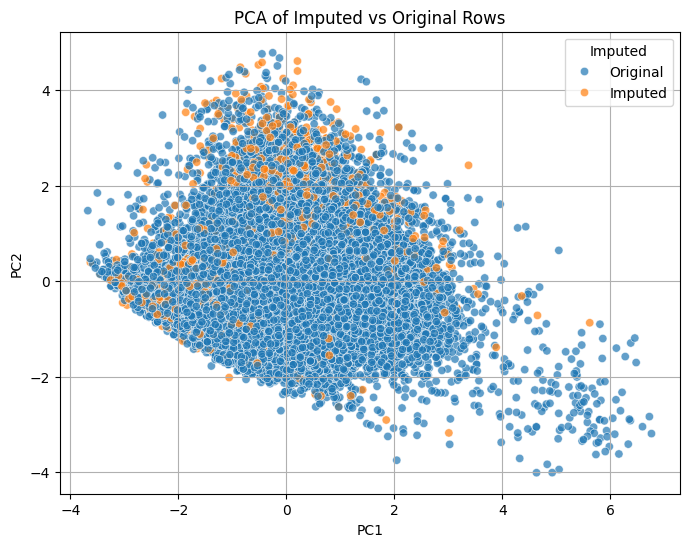

In [16]:
plot_pca_clusters(X_encoded, was_imputed, title="PCA of Imputed vs Original Rows")


In [17]:
# Since this feature has relatively few missing values and the distribution analysis shows no significant bias across other features,
# I believe it can be safely removed without impacting model integrity.

df_train_imputed = df_train_imputed.dropna()
df_test_imputed = df_test_imputed.dropna()

## Feature engineering


In [18]:
class IncomeFeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        # Binary gender
        df['is_male'] = (df['sex'] == 'Male').astype(int)

        # Capital net
        df['capital_net'] = df['capital-gain'] - df['capital-loss']

        # Age group (ordinal)
        df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Senior', 'Elder'])
        age_order = {'Young': 0, 'Adult': 1, 'Senior': 2, 'Elder': 3}
        df['age_group'] = df['age_group'].map(age_order)


        # Hours per age
        df['hours_per_age'] = df['hours-per-week'] / (df['age'] + 1)

        # Capital per education
        df['capital_per_edu'] = df['capital_net'] / (df['education-num'] + 1)

        # Education-age ratio
        df['education_age_ratio'] = df['education-num'] / (df['age'] + 1)

        # Education group
        edu_map = {
            'Preschool': 'Low', '1st-4th': 'Low', '5th-6th': 'Low', '7th-8th': 'Low',
            '9th': 'Low', '10th': 'Low', '11th': 'Low', '12th': 'Low',
            'HS-grad': 'Mid', 'Some-college': 'Mid', 'Assoc-acdm': 'Mid', 'Assoc-voc': 'Mid',
            'Bachelors': 'High', 'Masters': 'High', 'Doctorate': 'High', 'Prof-school': 'High'
        }
        df['education_level_group'] = df['education'].map(edu_map)
        education_level_order = {'Low': 0, 'Mid': 1, 'High': 2}
        df['education_level_group'] = df['education_level_group'].map(education_level_order)

        # Occupation category
        occ_map = {
            'Exec-managerial': 'White-collar', 'Prof-specialty': 'White-collar',
            'Craft-repair': 'Blue-collar', 'Machine-op-inspct': 'Blue-collar',
            'Handlers-cleaners': 'Blue-collar', 'Transport-moving': 'Blue-collar',
            'Adm-clerical': 'Service', 'Sales': 'Service', 'Other-service': 'Service',
            'Farming-fishing': 'Manual', 'Priv-house-serv': 'Manual', 'Protective-serv': 'Service',
            'Tech-support': 'Service', 'Armed-Forces': 'Military'
        }
        df['occupation_category'] = df['occupation'].map(occ_map)

        # Workclass category
        wc_map = {
            'Private': 'Private', 'Self-emp-not-inc': 'Self-employed', 'Self-emp-inc': 'Self-employed',
            'Federal-gov': 'Government', 'Local-gov': 'Government', 'State-gov': 'Government',
            'Without-pay': 'Unemployed', 'Never-worked': 'Unemployed'
        }
        df['workclass_category'] = df['workclass'].map(wc_map)

        # Region group
        asia = ['India', 'China', 'Japan', 'Philippines', 'Vietnam', 'Thailand', 'Taiwan', 'Laos', 'Cambodia', 'Hong']
        europe = ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland', 'Scotland', 'Greece', 'Yugoslavia', 'Hungary', 'Holand-Netherlands']
        americas = ['United-States', 'Canada', 'Mexico', 'Puerto-Rico', 'Jamaica', 'Cuba', 'Dominican-Republic', 'Honduras', 'Columbia', 'Guatemala', 'Nicaragua', 'El-Salvador', 'Ecuador', 'Trinadad&Tobago', 'Peru']
        africa = ['South']
        df['region_group'] = df['native-country'].apply(
            lambda x: 'Asia' if x in asia else 'Europe' if x in europe else 'Americas' if x in americas else 'Africa' if x in africa else 'Other'
        )

        # Interaction terms
        df['is_married'] = df['marital-status'].str.contains('Married').astype(int)
        df['married_occupation'] = df['is_married'].astype(str) + '_' + df['occupation_category'].fillna('Unknown')

        # Composite categories
        df['sex_occupation'] = df['sex'] + '_' + df['occupation'].fillna('Unknown')
        df['sex_marital'] = df['sex'] + '_' + df['marital-status'].fillna('Unknown')

        df.drop(columns=['sex'], inplace=True, errors='ignore')
        df.drop(columns=['education'], inplace=True, errors='ignore')
        df.drop(columns=['occupation'], inplace=True, errors='ignore')
        df.drop(columns=['workclass'], inplace=True, errors='ignore')
        df.drop(columns=['native-country'], inplace=True, errors='ignore')

        return df


In [19]:
X_train = df_train.drop(columns=['Income'])
X_test = df_test.drop(columns=['Income'])

y_train = df_train['Income']
y_test = df_test['Income']

In [20]:
# Define nominal and ordinal columns
nominal_cols = ['marital-status', 'relationship', 'race', 'occupation_category', 'workclass_category', 'region_group', 'married_occupation', 'sex_occupation', 'sex_marital']
ordinal_cols = ['education-num', 'age_group', 'education_level_group']

# Define imputers and encoders
nominal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_pipe, nominal_cols),
    ('ordinal', ordinal_pipe, ordinal_cols)
], remainder='passthrough')

# Full pipeline
full_pipeline = Pipeline([
    ('feature_engineering', IncomeFeatureEngineer()),
    ('preprocessing', preprocessor)
])


In [21]:
full_pipeline.fit(X_train)

X_train_encoded  = full_pipeline.transform(X_train)
X_test_encoded  = full_pipeline.transform(X_test)

In [22]:
feature_names = full_pipeline.named_steps['preprocessing'].get_feature_names_out()


In [23]:
# Create DataFrame from transformed array
df_X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)

In [24]:
df_X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

In [25]:
df_X_train_encoded

,nominal__marital-status_Divorced,nominal__marital-status_Married-AF-spouse,nominal__marital-status_Married-civ-spouse,nominal__marital-status_Married-spouse-absent,nominal__marital-status_Never-married,nominal__marital-status_Separated,nominal__marital-status_Widowed,nominal__relationship_Husband,nominal__relationship_Not-in-family,nominal__relationship_Other-relative,nominal__relationship_Own-child,nominal__relationship_Unmarried,nominal__relationship_Wife,nominal__race_Amer-Indian-Eskimo,nominal__race_Asian-Pac-Islander,nominal__race_Black,nominal__race_Other,nominal__race_White,nominal__occupation_category_Blue-collar,nominal__occupation_category_Manual,nominal__occupation_category_Military,nominal__occupation_category_None,nominal__occupation_category_Service,nominal__occupation_category_White-collar,nominal__workclass_category_Government,nominal__workclass_category_None,nominal__workclass_category_Private,nominal__workclass_category_Self-employed,nominal__workclass_category_Unemployed,nominal__region_group_Africa,nominal__region_group_Americas,nominal__region_group_Asia,nominal__region_group_Europe,nominal__region_group_Other,nominal__married_occupation_0_Blue-collar,nominal__married_occupation_0_Manual,nominal__married_occupation_0_Military,nominal__married_occupation_0_Service,nominal__married_occupation_0_Unknown,nominal__married_occupation_0_White-collar,nominal__married_occupation_1_Blue-collar,nominal__married_occupation_1_Manual,nominal__married_occupation_1_Military,nominal__married_occupation_1_Service,nominal__married_occupation_1_Unknown,nominal__married_occupation_1_White-collar,nominal__sex_occupation_Female_Adm-clerical,nominal__sex_occupation_Female_Craft-repair,nominal__sex_occupation_Female_Exec-managerial,nominal__sex_occupation_Female_Farming-fishing,nominal__sex_occupation_Female_Handlers-cleaners,nominal__sex_occupation_Female_Machine-op-inspct,nominal__sex_occupation_Female_Other-service,nominal__sex_occupation_Female_Priv-house-serv,nominal__sex_occupation_Female_Prof-specialty,nominal__sex_occupation_Female_Protective-serv,nominal__sex_occupation_Female_Sales,nominal__sex_occupation_Female_Tech-support,nominal__sex_occupation_Female_Transport-moving,nominal__sex_occupation_Female_Unknown,nominal__sex_occupation_Male_Adm-clerical,nominal__sex_occupation_Male_Armed-Forces,nominal__sex_occupation_Male_Craft-repair,nominal__sex_occupation_Male_Exec-managerial,nominal__sex_occupation_Male_Farming-fishing,nominal__sex_occupation_Male_Handlers-cleaners,nominal__sex_occupation_Male_Machine-op-inspct,nominal__sex_occupation_Male_Other-service,nominal__sex_occupation_Male_Priv-house-serv,nominal__sex_occupation_Male_Prof-specialty,nominal__sex_occupation_Male_Protective-serv,nominal__sex_occupation_Male_Sales,nominal__sex_occupation_Male_Tech-support,nominal__sex_occupation_Male_Transport-moving,nominal__sex_occupation_Male_Unknown,nominal__sex_marital_Female_Divorced,nominal__sex_marital_Female_Married-AF-spouse,nominal__sex_marital_Female_Married-civ-spouse,nominal__sex_marital_Female_Married-spouse-absent,nominal__sex_marital_Female_Never-married,nominal__sex_marital_Female_Separated,nominal__sex_marital_Female_Widowed,nominal__sex_marital_Male_Divorced,nominal__sex_marital_Male_Married-AF-spouse,nominal__sex_marital_Male_Married-civ-spouse,nominal__sex_marital_Male_Married-spouse-absent,nominal__sex_marital_Male_Never-married,nominal__sex_marital_Male_Separated,nominal__sex_marital_Male_Widowed,ordinal__education-num,ordinal__age_group,ordinal__education_level_group,remainder__age,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__is_male,remainder__capital_net,remainder__hours_per_age,remainder__capital_per_edu,remainder__education_age_ratio,remainder__is_married
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [26]:
missing = df_X_train_encoded.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False).to_frame(name='MissingCount')
missing

,MissingCount


In [27]:
missing = df_X_test_encoded.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False).to_frame(name='MissingCount')
missing

,MissingCount


In [28]:
def check_column_alignment(train_df, test_df):
    train_cols = set(train_df.columns)
    test_cols = set(test_df.columns)

    print("=== Column Alignment Check ===\n")

    # Train vs Test
    print("Train vs Test:")
    print("Columns in train but not in test:", sorted(train_cols - test_cols))
    print("Columns in test but not in train:", sorted(test_cols - train_cols))
    print()


    # Common Columns
    common_cols = train_cols & test_cols
    print(f"Columns shared across all sets: {len(common_cols)}")

    return common_cols

In [29]:
common_cols = check_column_alignment(df_X_train_encoded, df_X_test_encoded)

=== Column Alignment Check ===

Train vs Test:
Columns in train but not in test: []
Columns in test but not in train: []

Columns shared across all sets: 102


# paCe: Construct Stage


## Modeling Approach A: Logistic Regression Model


### Get data for the linear regression model

In [31]:
X_train = df_X_train_encoded.copy()
X_test = df_X_test_encoded.copy()

In [ ]:
X_train

Instantiate your model and fit it to the training data.

In [33]:
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate model

In [40]:
def evaluate_classification_model(model, X_val, y_val, model_name="Model", average='binary', class_names=None):
    # Predict class labels
    y_pred = model.predict(X_val)

    # Predict probabilities for AUC (if applicable)
    try:
        y_proba = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_proba)
    except:
        auc = None

    # Metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average=average, zero_division=0)
    recall = recall_score(y_val, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_val, y_pred, average=average, zero_division=0)
    cm = confusion_matrix(y_val, y_pred)

    # Display metrics
    print(f"\nEvaluation results for {model_name}:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    if auc is not None:
        print(f"ROC AUC:   {auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred, zero_division=0))

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else 'auto',
                yticklabels=class_names if class_names else 'auto')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.tight_layout()
    plt.show()

    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': auc,
        'confusion_matrix': cm
    }


=== Test set model performance ===

Evaluation results for Logistic regression:
Accuracy:  0.8297
Precision: 0.6880
Recall:    0.5291
F1 Score:  0.5982
ROC AUC:   0.8700

Confusion Matrix:
[[10727   877]
 [ 1721  1934]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     11604
           1       0.69      0.53      0.60      3655

    accuracy                           0.83     15259
   macro avg       0.77      0.73      0.75     15259
weighted avg       0.82      0.83      0.82     15259



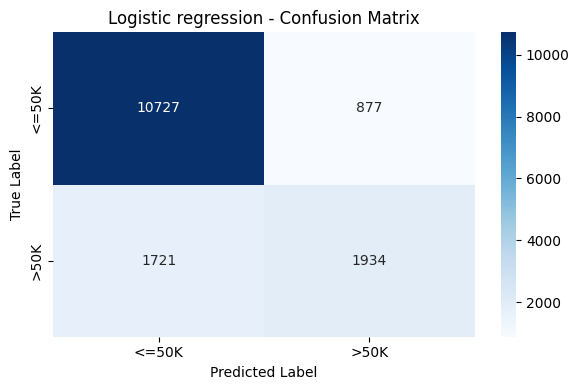


=== Train set model performance ===

Evaluation results for Logistic regression:
Accuracy:  0.8265
Precision: 0.6913
Recall:    0.5416
F1 Score:  0.6074
ROC AUC:   0.8658

Confusion Matrix:
[[20142  1744]
 [ 3305  3905]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     21886
           1       0.69      0.54      0.61      7210

    accuracy                           0.83     29096
   macro avg       0.78      0.73      0.75     29096
weighted avg       0.82      0.83      0.82     29096



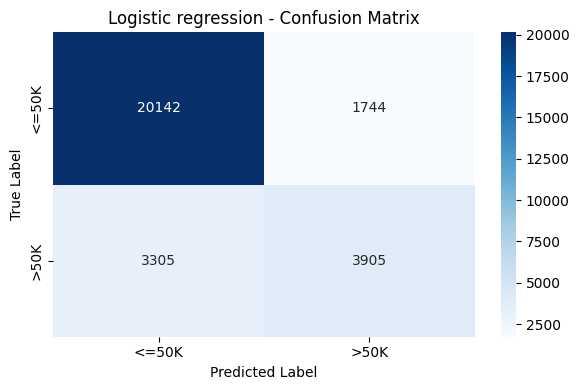

In [41]:
print("=== Test set model performance ===")
metrics = evaluate_classification_model(log_clf, X_test, y_test, model_name="Logistic regression", class_names=['<=50K', '>50K'])
print("")
print("=== Train set model performance ===")
metrics = evaluate_classification_model(log_clf, X_train, y_train, model_name="Logistic regression", class_names=['<=50K', '>50K'])


### Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model.

In [39]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,nominal__marital-status_Divorced,-0.147219
1,nominal__marital-status_Married-AF-spouse,0.001534
2,nominal__marital-status_Married-civ-spouse,0.504789
3,nominal__marital-status_Married-spouse-absent,-0.023853
4,nominal__marital-status_Never-married,-0.570403
...,...,...
97,remainder__capital_net,-0.000070
98,remainder__hours_per_age,-0.431823
99,remainder__capital_per_edu,-0.001035
100,remainder__education_age_ratio,-0.129294


## Modeling Approach B: Tree-based Model


In [42]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3]
}

# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm_params = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.3]
}


scoring = ['accuracy', 'precision', 'recall', 'f1']

In [43]:
def tune_classifier(model, param_grid, X_train, y_train, model_name="Model",
                    scoring=None, cv=5, refit='accuracy', verbose=1, n_jobs=-1):

    print(f"\nTuning hyperparameters for {model_name}...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        refit=refit,
        n_jobs=n_jobs,
        verbose=verbose,
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best {refit}: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_, grid_search


In [44]:
best_rf, rf_cv_results = tune_classifier(
    model=rf,
    param_grid=rf_params,
    X_train=X_train,
    y_train=y_train,
    model_name="Random Forest",
    scoring=scoring,
    cv=5,
    refit='f1'
)


Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best f1: 0.6787


=== Test set model performance ===

Evaluation results for Random Forest:
Accuracy:  0.8631
Precision: 0.7683
Recall:    0.6134
F1 Score:  0.6822
ROC AUC:   0.9144

Confusion Matrix:
[[10928   676]
 [ 1413  2242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11604
           1       0.77      0.61      0.68      3655

    accuracy                           0.86     15259
   macro avg       0.83      0.78      0.80     15259
weighted avg       0.86      0.86      0.86     15259



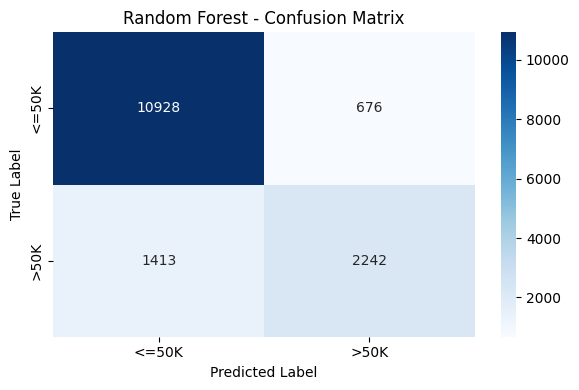


=== Train set model performance ===

Evaluation results for Random Forest:
Accuracy:  0.9250
Precision: 0.8961
Recall:    0.7886
F1 Score:  0.8390
ROC AUC:   0.9814

Confusion Matrix:
[[21227   659]
 [ 1524  5686]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     21886
           1       0.90      0.79      0.84      7210

    accuracy                           0.92     29096
   macro avg       0.91      0.88      0.90     29096
weighted avg       0.92      0.92      0.92     29096



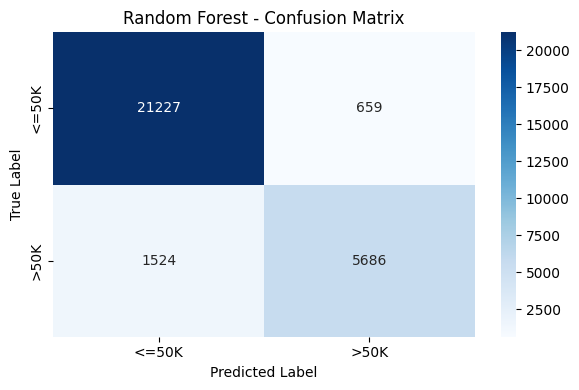

In [46]:
print("=== Test set model performance ===")
metrics = evaluate_classification_model(best_rf, X_test, y_test, model_name="Random Forest", class_names=['<=50K', '>50K'])
print("")
print("=== Train set model performance ===")
metrics = evaluate_classification_model(best_rf, X_train, y_train, model_name="Random Forest", class_names=['<=50K', '>50K'])


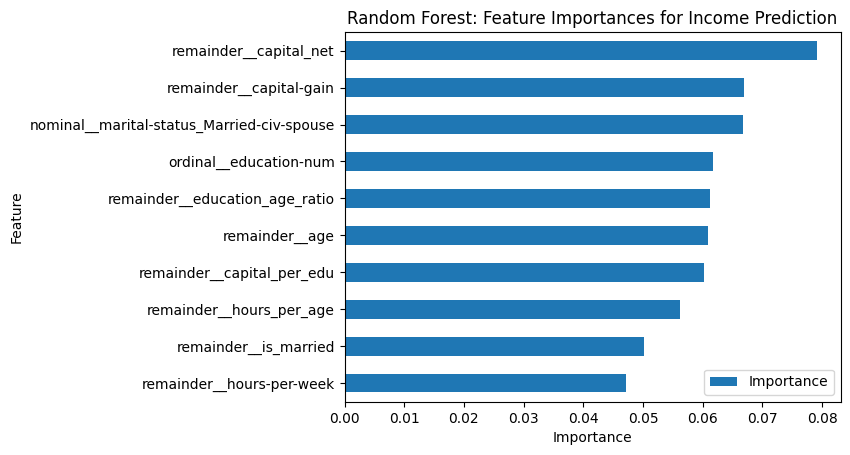

In [60]:
# Get feature importances
feat_impt = best_rf.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(best_rf.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X_train.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Income Prediction", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [47]:
best_xgb, xgb_cv_results = tune_classifier(
    model=xgb,
    param_grid=xgb_params,
    X_train=X_train,
    y_train=y_train,
    model_name="XGBoost",
    scoring=scoring,
    cv=5,
    refit='f1'
)


Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:03:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
Best f1: 0.7085


=== Test set model performance ===

Evaluation results for XGBoost:
Accuracy:  0.8700
Precision: 0.7674
Recall:    0.6564
F1 Score:  0.7076
ROC AUC:   0.9263

Confusion Matrix:
[[10877   727]
 [ 1256  2399]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11604
           1       0.77      0.66      0.71      3655

    accuracy                           0.87     15259
   macro avg       0.83      0.80      0.81     15259
weighted avg       0.87      0.87      0.87     15259



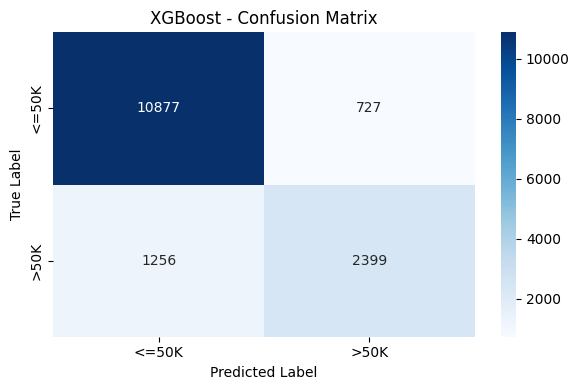


=== Train set model performance ===

Evaluation results for XGBoost:
Accuracy:  0.8784
Precision: 0.8002
Recall:    0.6786
F1 Score:  0.7344
ROC AUC:   0.9413

Confusion Matrix:
[[20664  1222]
 [ 2317  4893]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     21886
           1       0.80      0.68      0.73      7210

    accuracy                           0.88     29096
   macro avg       0.85      0.81      0.83     29096
weighted avg       0.87      0.88      0.87     29096



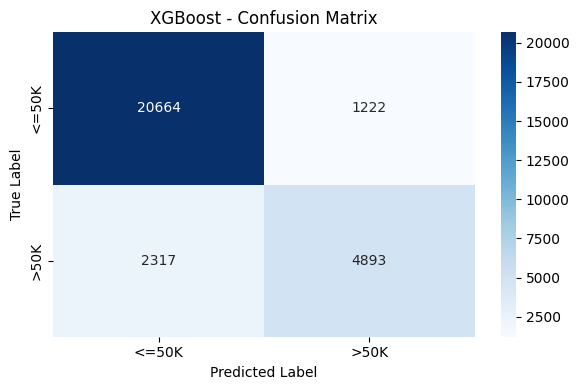

In [48]:
print("=== Test set model performance ===")
metrics = evaluate_classification_model(best_xgb, X_test, y_test, model_name="XGBoost", class_names=['<=50K', '>50K'])
print("")
print("=== Train set model performance ===")
metrics = evaluate_classification_model(best_xgb, X_train, y_train, model_name="XGBoost", class_names=['<=50K', '>50K'])


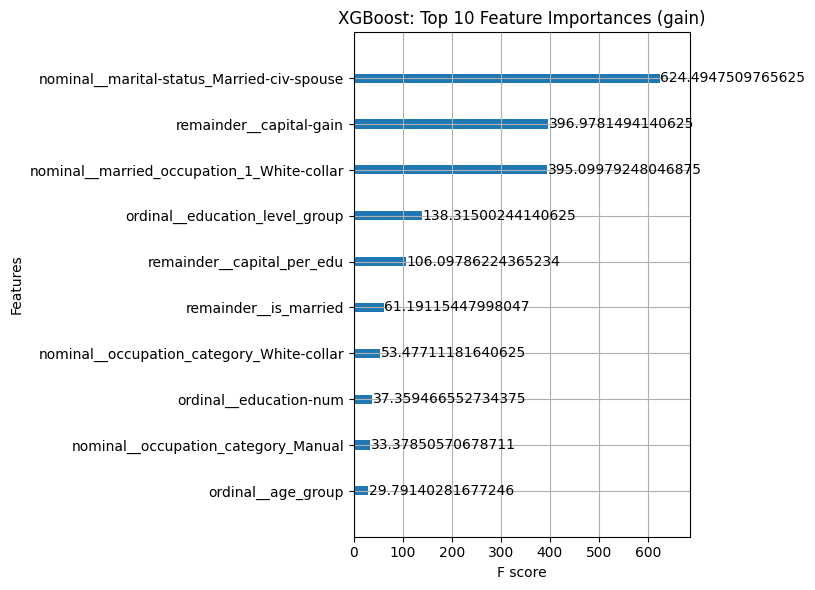

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
xgb_plot_importance(best_xgb, ax=ax, max_num_features=10, importance_type='gain')
ax.set_title("XGBoost: Top 10 Feature Importances (gain)")
plt.tight_layout()
plt.show()


In [49]:
best_lgbm, lgbm_cv_results = tune_classifier(
    model=lgbm,
    param_grid=lgbm_params,
    X_train=X_train,
    y_train=y_train,
    model_name="LightGBM",
    scoring=scoring,
    cv=5,
    refit='f1'
)


Tuning hyperparameters for LightGBM...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 7210, number of negative: 21886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1451
[LightGBM] [Info] Number of data points in the train set: 29096, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247800 -> initscore=-1.110378
[LightGBM] [Info] Start training from score -1.110378

Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100}
Best f1: 0.7066


=== Test set model performance ===

Evaluation results for LightGBM:
Accuracy:  0.8689
Precision: 0.7666
Recall:    0.6506
F1 Score:  0.7039
ROC AUC:   0.9258

Confusion Matrix:
[[10880   724]
 [ 1277  2378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11604
           1       0.77      0.65      0.70      3655

    accuracy                           0.87     15259
   macro avg       0.83      0.79      0.81     15259
weighted avg       0.86      0.87      0.87     15259



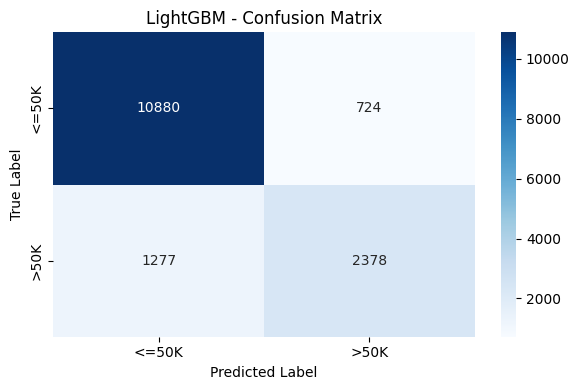


=== Train set model performance ===

Evaluation results for LightGBM:
Accuracy:  0.8804
Precision: 0.8047
Recall:    0.6831
F1 Score:  0.7389
ROC AUC:   0.9444

Confusion Matrix:
[[20691  1195]
 [ 2285  4925]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     21886
           1       0.80      0.68      0.74      7210

    accuracy                           0.88     29096
   macro avg       0.85      0.81      0.83     29096
weighted avg       0.88      0.88      0.88     29096



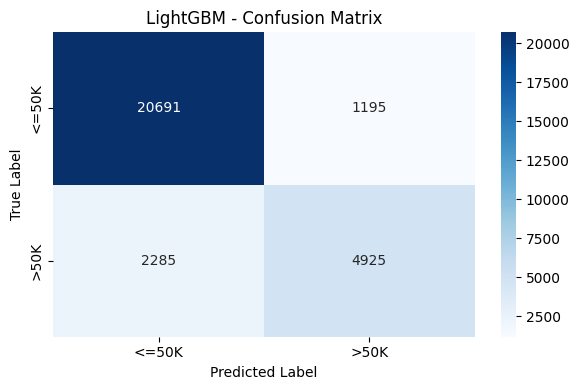

In [50]:
print("=== Test set model performance ===")
metrics = evaluate_classification_model(best_lgbm, X_test, y_test, model_name="LightGBM", class_names=['<=50K', '>50K'])
print("")
print("=== Train set model performance ===")
metrics = evaluate_classification_model(best_lgbm, X_train, y_train, model_name="LightGBM", class_names=['<=50K', '>50K'])


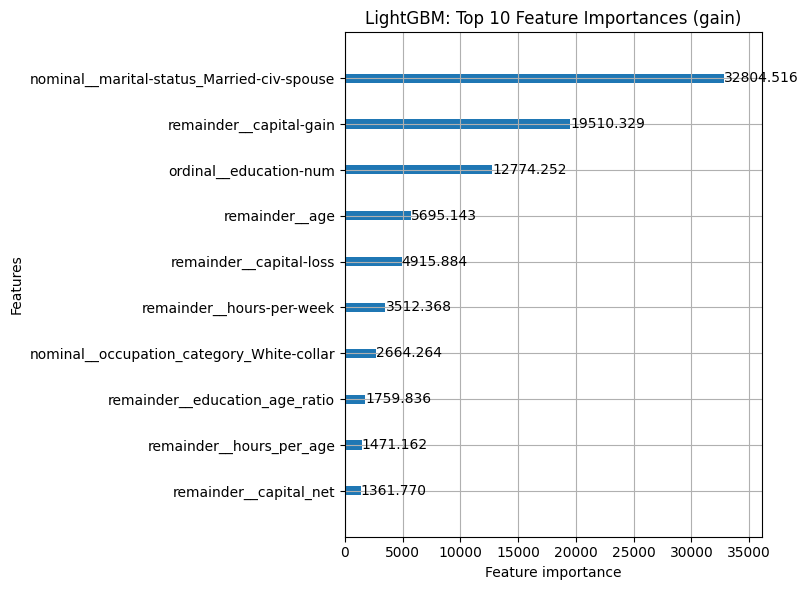

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
lgb_plot_importance(best_lgbm, ax=ax, max_num_features=10, importance_type='gain')
ax.set_title("LightGBM: Top 10 Feature Importances (gain)")
plt.tight_layout()
plt.show()


## Address class imbalance using SDV to synthesize additional data.

In [51]:
from collections import Counter

# Check how imbalanced the original dataset is
target_counts = Counter(y_train)
majority_class = max(target_counts, key=target_counts.get)
minority_class = min(target_counts, key=target_counts.get)

majority_count = target_counts[majority_class]
minority_count = target_counts[minority_class]

needed_minority = majority_count - minority_count
print(f"Need {needed_minority} additional samples of the minority class to balance the dataset.")


Need 14676 additional samples of the minority class to balance the dataset.


In [52]:
# Combine features and target for fitting
train_df = X_train.copy()
train_df['Income'] = y_train  # or your target column name

# Filter only the minority class
minority_df = train_df[train_df['Income'] == minority_class]

In [53]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import Metadata

# Detect metadata from minority class only
metadata = Metadata.detect_from_dataframe(minority_df)

# Fit synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(minority_df)

# Generate synthetic minority class samples
synthetic_minority_df = synthesizer.sample(num_rows=needed_minority)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [54]:
# Combine original training data with synthetic minority class data
balanced_train_df = pd.concat([train_df, synthetic_minority_df], axis=0)

# Separate features and labels again
X_train_balanced = balanced_train_df.drop('Income', axis=1)
y_train_balanced = balanced_train_df['Income']

In [57]:
best_xgb, xgb_cv_results = tune_classifier(
    model=xgb,
    param_grid=xgb_params,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    model_name="XGBoost",
    scoring=scoring,
    cv=5,
    refit='f1'
)


Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
Best f1: 0.8671


=== Test set model performance ===

Evaluation results for XGBoost:
Accuracy:  0.8691
Precision: 0.7681
Recall:    0.6498
F1 Score:  0.7040
ROC AUC:   0.9240

Confusion Matrix:
[[10887   717]
 [ 1280  2375]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11604
           1       0.77      0.65      0.70      3655

    accuracy                           0.87     15259
   macro avg       0.83      0.79      0.81     15259
weighted avg       0.86      0.87      0.87     15259



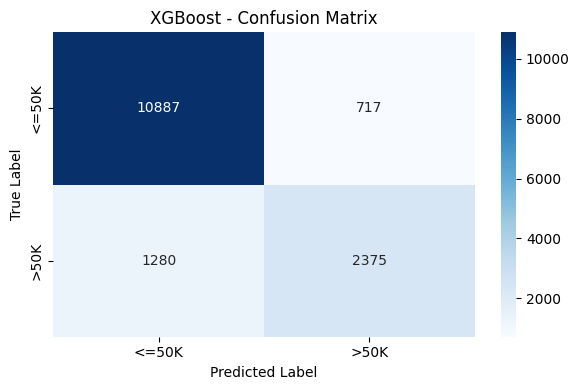


=== Train set model performance ===

Evaluation results for XGBoost:
Accuracy:  0.9168
Precision: 0.9399
Recall:    0.8906
F1 Score:  0.9146
ROC AUC:   0.9794

Confusion Matrix:
[[20640  1246]
 [ 2395 19491]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     21886
           1       0.94      0.89      0.91     21886

    accuracy                           0.92     43772
   macro avg       0.92      0.92      0.92     43772
weighted avg       0.92      0.92      0.92     43772



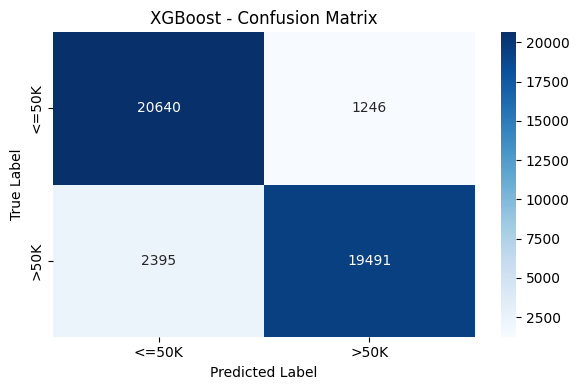

In [58]:
print("=== Test set model performance ===")
metrics = evaluate_classification_model(best_xgb, X_test, y_test, model_name="XGBoost", class_names=['<=50K', '>50K'])
print("")
print("=== Train set model performance ===")
metrics = evaluate_classification_model(best_xgb, X_train_balanced, y_train_balanced, model_name="XGBoost", class_names=['<=50K', '>50K'])


# pacE: Execute Stage




### Summary of model results

| Model             | Accuracy | Precision | Recall | F1 Score | ROC AUC | Performance Notes           |
| ----------------- | -------- | --------- | ------ | -------- | ------- | --------------------------- |
| **Random Forest** | 0.8631   | 0.7683    | 0.6134 | 0.6822   | 0.9144  | Balanced, lower recall      |
| **XGBoost**       | 0.8700   | 0.7674    | 0.6564 | 0.7076   | 0.9263  | Best overall performance    |
| **LightGBM**      | 0.8689   | 0.7666    | 0.6506 | 0.7039   | 0.9258  | Close to XGBoost, efficient |



**Insights:**

- XGBoost slightly outperforms others across most metrics, especially in F1 and ROC AUC, making it the most well-rounded model here.

- LightGBM performs almost as well but may offer faster training time depending on hardware and data.

- Random Forest has solid performance but lower recall, indicating it may miss more positive cases compared to the other two.